## Series y Data Frame

Pandas tiene dos estructuras de datos Series y Data Frame.  
Series es un objeto tipo array unidimensional, y Data Frame es un objeto tipo array bidimensional.  
Ambos objetos también contienen información adicional sobre los datos llamada metadatos:

In [15]:
import pandas as pd
x = pd.Series([6,3,8,6])
x

0    6
1    3
2    8
3    6
dtype: int64

Por defecto aparece el índice. Para cambiarlos se puede utilizar index:

In [16]:
x = pd.Series([6,3,8,6], index=['q','w','e','r'])
x

q    6
w    3
e    8
r    6
dtype: int64

In [17]:
x['w']

3

Es habitual convertir un diccionario en una serie:

In [18]:
age = {'Tim':29, 'Jim':31, 'Pam':27, 'Sam':35}
x = pd.Series(age)
x

Tim    29
Jim    31
Pam    27
Sam    35
dtype: int64

In [19]:
data ={'name': ['Tim', 'Jim', 'Pam','Sam'],
		'age' : [  29 ,  31  ,  27  ,  35 ],
		'ZIP' : ['02115','02130','67700','00100']
		}

Creamos un dataframe con indices personalizados:

In [20]:
x = pd.DataFrame(data, columns = ['name', 'age', 'ZIP'], index=list("qwer"))
x

,name,age,ZIP
q,Tim,29,02115
w,Jim,31,02130
e,Pam,27,67700
r,Sam,35,00100


Reordenar los índices de un objeto pandas Series según su argumento:

In [21]:
x.reindex(sorted(x.index))

,name,age,ZIP
e,Pam,27,67700
q,Tim,29,02115
r,Sam,35,00100
w,Jim,31,02130


Si quisiera cambiar por otra lista de indices:

In [22]:
x.index = list("abcd")

In [23]:
x

,name,age,ZIP
a,Tim,29,02115
b,Jim,31,02130
c,Pam,27,67700
d,Sam,35,00100


operar con diferentes indices, pandas pone NaN en aquellos indices que no coinciden:

In [24]:
x = pd.Series([6,3,8,6], index=['q','w','e','r'])
y = pd.Series([7,3,5,2], index=['e', 'q', 'r', 't'])
x+y

e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64

## Loading and Inspecting Data

In [25]:
import numpy as np 
import pandas as pd
whisky = pd.read_csv('whiskies.txt')
whisky['Region'] = pd.read_csv('regions.txt') #Añadimos una columna Region
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [26]:
# df.iloc: seleccionamos filas y columnas a partir del indice
whisky.iloc[5:10, 0:5]

,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


In [27]:
flavors = whisky.iloc[:, 2:14]

## Correlations

Hay muchos tipos diferentes de correlaciones, y por defecto, la función utiliza lo que se correlación de Pearson, que estima correlaciones lineales en los datos.

In [28]:
corr_flavors = pd.DataFrame.corr(flavors)
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


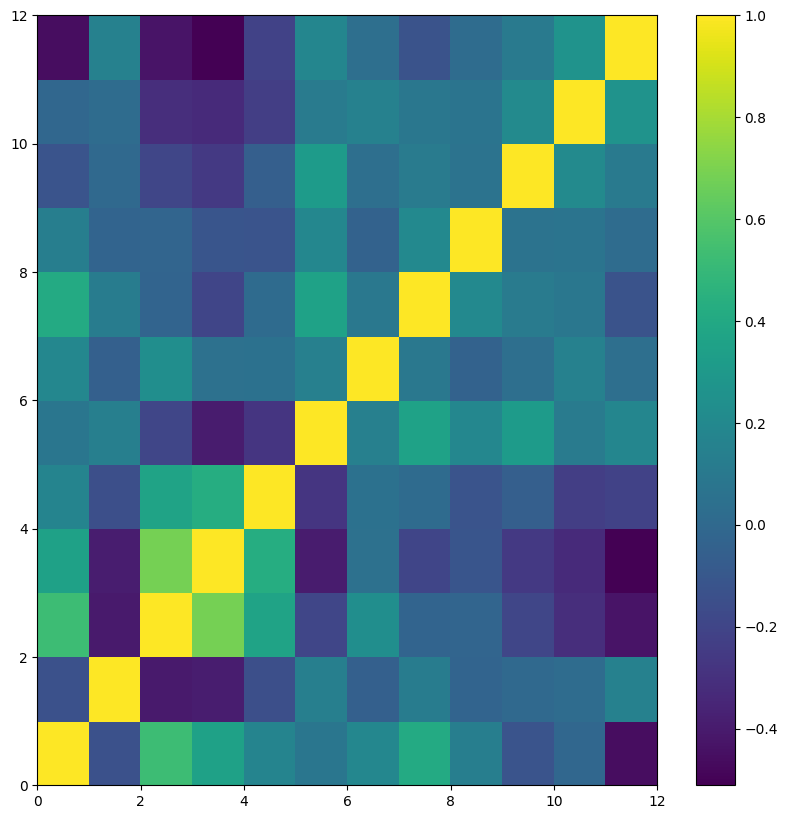

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors) #correlation matrix by color
plt.colorbar() # plots a colorbar on the side of a plot
plt.savefig('corr_flavor.pdf')

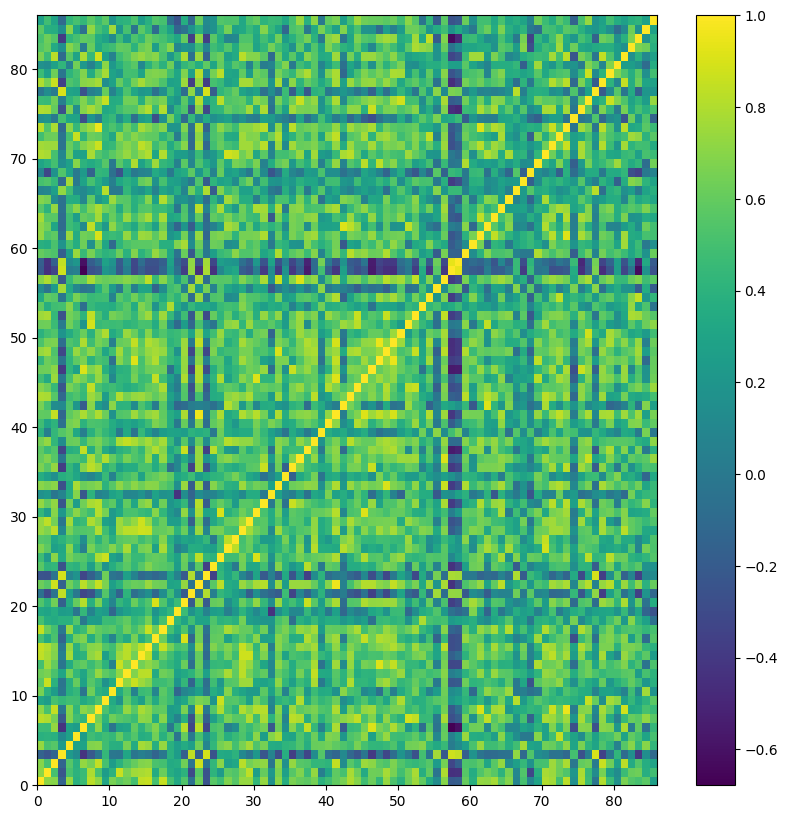

In [30]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky) # correlation matrix by color
plt.colorbar()
plt.axis('tight') #Así se ajusta y no muestra datos vacios
plt.savefig('corr_whisky.pdf')

## Clustering Whiskies By Flavor Profile

Para ello utilizaremos un método de clustering del módulo de machine learning scikit-learn de scikit-learn.

### Spectral co-clustering

Una forma de pensar en el método de co-clustering espectral es considerar una lista de palabras y una lista de documentos.  


<img src="clustering.jpg">   


Cada cluster se compone tanto de palabras como de documentos.  
El problema tal y como lo acabo de presentar sigue siendo muy difícil de   abordar, pero resulta que podemos encontrar una solución aproximada al problema.


El objetivo es encontrar clusters compuestos por palabras y documentos que suelen ir juntos.  

También podemos pensar en documentos que traten de campos científicos específicos, como la biología o la física.  
El término co-clustering se refiere a la idea de encontrar simultáneamente
clústeres de palabras y clústeres de documentos.

En primer lugar, podemos representar este grafo como una matriz de adyacencia, en la que las filas corresponden a palabras y las columnas a documentos.


Podemos entonces tomar esta matriz, manipularla de ciertas maneras, y encontrar una solución aproximada al problema de agrupamiento planteado, en términos de valores (eigenvalues) y vectores propios (eigenvectors) de esta matriz modificada.


No entraremos aquí en detalles, pero el término espectral se refiere al uso de valores propios y vectores propios de alguna matriz, y este es el significado del término espectral en el co-clustering espectral.


Podemos pensar en la técnica de co-clustering como una agrupación simultánea las filas y columnas de la matriz, sea lo que sea lo que representan.
En este caso, utilizaremos el enfoque
para encontrar grupos de whiskys en nuestra matriz de correlación de sabores de whisky.


Este método reordena de manera efectiva las filas y columnas de la matriz de correlación para que podamos ver con más claridad los bloques correspondientes a los grupos de whiskys más claramente.  
Dado que los whiskys del conjunto de datos proceden de seis regiones diferentes, vamos a pedir al algoritmo de agrupación que encuentre seis bloques.



Capturaremos esto como nuestro modelo.  
Ya hemos creado el objeto modelo.  
El segundo paso consiste en ajustar el modelo utilizando los datos de la matriz de correlaciones del whisky.

In [31]:
from sklearn.cluster import SpectralCoclustering
model=SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
        False, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False,  True,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

Veamos ahora los clusters que acabamos de descubrir.
El resultado es una matriz con las siguientes dimensiones número de filas de clusters por número de filas en la matriz de datos, la matriz de correlación, en este caso.
Las entradas de la matriz son verdaderas o falsas.  
Cada fila de esta matriz identifica un cluster, que aquí va de 0 a 5, y cada columna identifica una fila en la matriz de correlación, que aquí va de 0 a 85.


Si sumamos todas las columnas de esta matriz, podemos averiguar cuántas observaciones pertenecen a cada cluster.

In [32]:
np.sum(model.rows_,axis=1)

array([19,  5, 24, 18, 14,  6])

Si en su lugar sumamos todas las filas, podemos averiguar cuántos clusters pertenecen a cada observación.
Como cada observación pertenece a uno solo de los seis clusters, la respuesta debería ser 1 para todas ellas.

In [33]:
np.sum(model.rows_,axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
model.row_labels_

array([2, 2, 4, 5, 2, 0, 3, 2, 4, 3, 2, 0, 2, 0, 4, 4, 3, 2, 0, 1, 3, 5,
       3, 5, 3, 3, 2, 2, 3, 2, 3, 4, 0, 0, 0, 4, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 3, 4, 0, 0, 3, 3, 2, 2, 2, 0, 1, 2, 5, 5, 0, 3, 4, 2, 4, 3, 2,
       1, 2, 1, 0, 2, 4, 0, 4, 2, 4, 3, 5, 4, 3, 0, 4, 0, 0, 2, 0])

La observación numero 0 pertenece al cluster numero 2, la observación numero 1 también al cluster 2... Porque especificamos 6 clusters.


### Definición de Spectral Co-clustering

La coagrupación es un enfoque de agrupamiento que busca encontrar patrones de agrupación simultánea en filas y columnas de una matriz de datos. El algoritmo Spectral Co-Clustering (espectral de coagrupación) es una técnica específica de coagrupación que utiliza técnicas espectrales para **identificar patrones de agrupación en datos**.


La idea básica es convertir la matriz de datos en un grafo y realizar un análisis espectral en ese grafo para encontrar grupos coherentes tanto en filas como en columnas. Esto puede ser útil en situaciones **donde se espera que los grupos en las filas y columnas estén interrelacionados**.


Aquí hay un ejemplo muy simple para ilustrar el concepto:


Supongamos que tienes una matriz que representa la relación entre estudiantes y las asignaturas que han cursado. Las filas representan estudiantes, las columnas representan asignaturas y los valores de la matriz indican la calificación de cada estudiante en cada asignatura.


El algoritmo Spectral Co-Clustering intentaría identificar patrones en los que ciertos grupos de estudiantes tienden a tener un rendimiento similar en ciertos conjuntos de asignaturas, y viceversa.


En resumen, Spectral Co-Clustering es útil cuando buscas patrones de agrupación simultáneos en las filas y columnas de tus datos, y utiliza técnicas espectrales para realizar este análisis.

## Comparing Correlation Matrices

Dibujemos los clusters como grupos que acabamos de descubrir en nuestro Whisky DataFrame.  
También vamos a renombrar los índices para que coincidan con la ordenación.  
Podemos realizar esta operación en tres líneas de código.  

In [38]:
# Extraemos las etiquetas de los grupos del modelo y las añadimos a la tabla whisky
whisky['group'] = pd.Series(model.row_labels_, index=whisky.index)
# Reordenamos las filas en orden creciente por etiquetas de grupo
whisky= whisky.iloc[np.argsort(model.row_labels_)]
# reseteamos el índice de nuestro DataFrame
whisky = whisky.reset_index(drop=True)


Así vemos que cada observación está ligada a un grupo, se eligió 6 clusters por las regiones aquí se puede comparar si esos clusters realmente identifican las regiones o no.

In [43]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,group
0,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
1,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
2,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
3,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
4,48,Glenkinchie,1,2,1,0,0,1,2,0,0,2,2,2,EH34 5ET,344380,666690,Lowlands,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay,5
82,24,Clynelish,3,2,3,3,1,0,2,0,1,1,2,0,\tKW9 6LB,290250,904230,Highlands,5
83,59,Laphroig,4,2,4,4,1,0,0,1,1,1,0,0,PA42 7DU,138680,645160,Islay,5
84,58,Lagavulin,4,1,4,4,1,0,1,2,1,1,1,0,PA42 7DZ,140430,645730,Islay,5


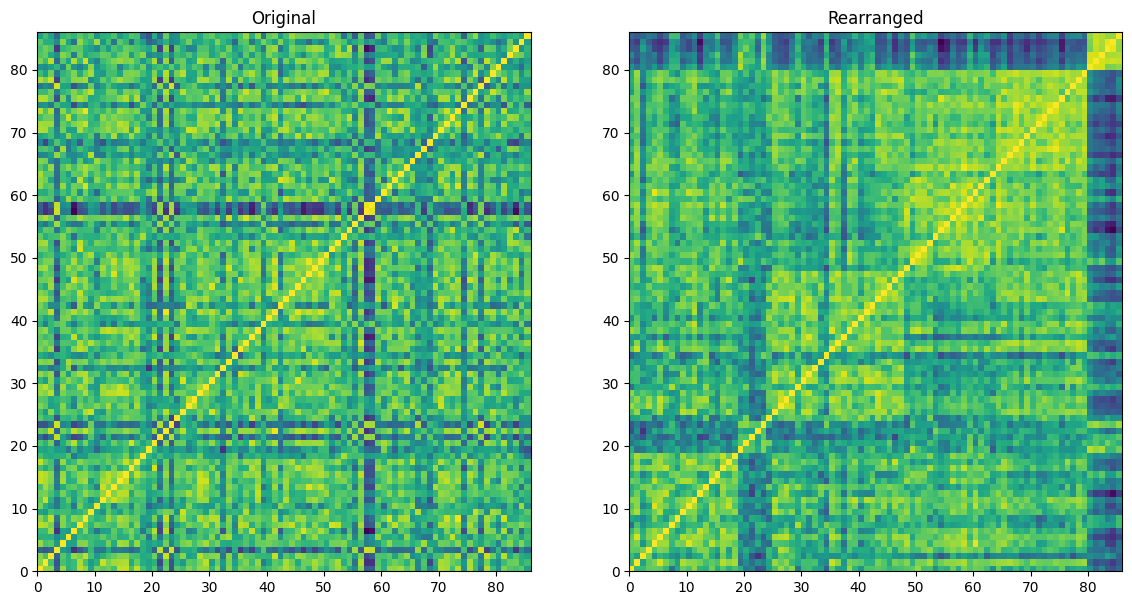

In [39]:
correlations = whisky.iloc[:, 2:14].transpose().corr() 
correlations = np.array(correlations) # now matrix reshuffled
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title('Original')
plt.axis('tight')

plt.subplot(122)
plt.pcolor(correlations)
plt.title('Rearranged')
plt.axis('tight')
plt.savefig('correlations.pdf')



La transposición (transpose()) se utiliza para intercambiar las filas y columnas de la matriz de correlación  
Esto facilita la visualización de cualquier patrón emergente en las relaciones entre las variables después de la agrupación.

Vemos que a lo largo de la recta en la segunda imagen se ven unos bloques, eso es porque ha reordenado las correlaciones y los ha agrupado en clusters.

Con seaborn se haria asi:

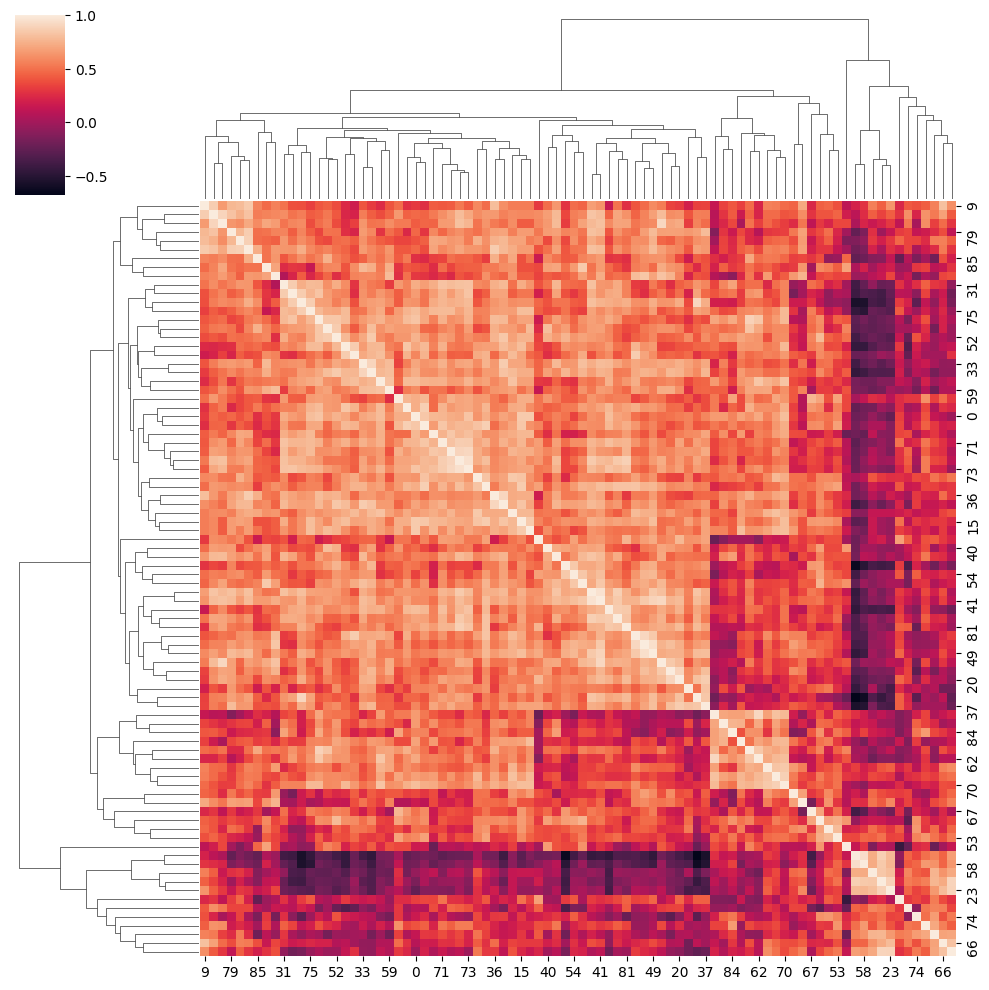

In [42]:
import seaborn as sns
sns.clustermap(corr_whisky)

In [44]:
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data[0]


1

data = pd.Series([1,2,3,4])  
data = data.iloc[[3,0,1,2]]  
que hace data[0]?  
1: data.iloc altera el orden de aparición, pero deja los índices igual. 

In [45]:
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data = data.reset_index(drop=True)
data[0]

4

El índice 0 de los datos se ha reordenado al índice 3 del original, que es 4.